<p> <h5> This notebook is the second version. This notebook uses the working parts from version 1, which had several error and trials </h5> </p>

 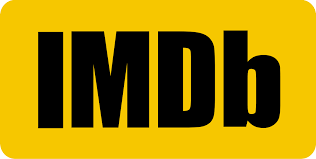 
# SENTIMENT ANALYSIS OF MOVIEW REVIEW From IMDB
## USING  Classical Machine Learning Models, Ensemble of Classical Machine Learning Models and DEEP NEURAL NETS

On a daily basis, billions of text data that express sentiment are
generated on the internet through social media and the entertainment industry.
Analyzing how a customer feels about a drama, tv series and movies are really
important to the entertainment industry. For instance, in case of movies, a movie
production company may need to know how customers feel about their movie. This
evaluation could be done through criteria such as was the movie good or bad, were
there parts of the movie that were good or bad, did the actors perform good or bad
and several other criteria. One way to evaluate these criteria would be through the
movie reviews left by customers. These reviews could be used to analyze the criteria
mentioned earlier. This analysis could be used to make changes in future movies
such as selecting an actor for a particular genre of movie, which part of movie should
be used for movie previews to attract people. This eventually will lead to increased
revenue for movie production companies. Thus the extreme need for Sentiment
analysis on movie review. The most popular platform today where people leave
movies reviews is IMDB. This project will analyze IMDB movie reviews and in a
broader sense will analyze whether a review for a movie is positive or negative. The
basic steps involve data mining and then training a machine learning model to
recognize whether a given movie’s review is positive or negative. Then the model
can predict whether a given review was positive or negative

## Task1: Load Data

In [87]:
import pandas as pd #for data container

In [88]:
raw_reviews_df = pd.read_csv("imdb_reviews.csv") #read from csv file

In [89]:
raw_reviews_df.shape #view dimensions of the pandas daframe

(50000, 2)

In [90]:
raw_reviews_df.iloc[0:1] #view one movie review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [91]:
raw_reviews_df.info() #vew information abot Daframe in general

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Task2: Preprocess Data

In [92]:
from matplotlib import pyplot as plt#to plot histogram

Text(0, 0.5, 'Number of samples')

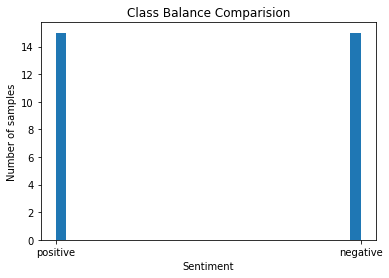

In [93]:
plt.hist(raw_reviews_df["sentiment"],density=True,bins=30)
plt.title("Class Balance Comparision")
plt.xlabel("Sentiment")
plt.ylabel("Number of samples")

In [94]:
print("Total Samples for Positive Sentiments: ",len(raw_reviews_df[raw_reviews_df["sentiment"]=="positive"]))
print("Total Samples for Negative Sentiments: ",len(raw_reviews_df[raw_reviews_df["sentiment"]=="negative"]))

Total Samples for Positive Sentiments:  25000
Total Samples for Negative Sentiments:  25000


In [95]:
print("Total Samples which do not have reviews: ",len(raw_reviews_df[raw_reviews_df["review"]==None]))

Total Samples which do not have reviews:  0


In [96]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud #library that allows word cloud to be generated

def generate_word_cloud(dataframe_df,column_name,img_file=None,background_color="black",max_words=2000):
    """ This function generates word cloud
    
    Args:
        dataframe: the datafram object which contains column whose word cloud is to be generated
        column_name: the name of the column in dataframw whose cloud is to be generated
        
    Returns:
        None
    """
    #convert the column specified by column_name in dataset_df(dataframe) to list
    sentences_list = dataframe_df[column_name].tolist()
    
    #convert a list to sentence
    #sentences_single_string = " ".join(sentences_list)
    sentences_single_string = " ".join(map(str,sentences_list))
    
    #plot word cloud
    plt.figure(figsize=(15,15))
    
    img_mask = None
    
    if img_file != None:
        img_mask = np.array(Image.open(img_file))

    wc = WordCloud(mask=img_mask,
                   max_words=max_words,
                   background_color=background_color)        
        
    plt.imshow(wc.generate(sentences_single_string),interpolation="bilinear")
    plt.title("Word Cloud For " +  column_name)
    plt.show()

In [97]:
import time

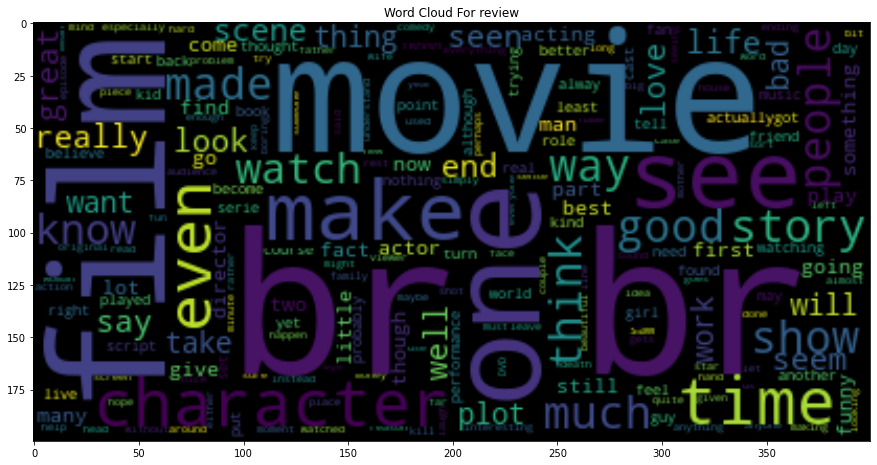

Total Time Taken: 48974.55906867981 ms


In [98]:
tic= time.time()
generate_word_cloud(raw_reviews_df,"review",background_color="black")
toc = time.time()
diff = 1000*(toc - tic)
print("Total Time Taken: " + str(diff) + " ms")

### Task 3: Text Preprocessing

In [99]:
#import required libraries
from nltk.corpus import stopwords #for stopwords
from nltk.stem import PorterStemmer #for word stemming
from nltk.tokenize import TweetTokenizer #for toekinizing string to list of words
import string #for punctuation
import re #for regular expression
import numpy as np

In [100]:
def process_string(text):
    """This function returns a processed list of words from the given text
    
    This function removes html elements and urls using regular expression, then
    converts string to list of workds, them find the stem of words in the list of words and
    finally removes stopwords and punctuation marks from list of words.
    
    Args:
        text(string): The text from which hrml elements, urls, stopwords, punctuation are removed and stemmed
        
    Returns:
        clean_text(string): A text formed after text preprocessing.
    """
    
    #remove any urls from the text
    text = re.sub(r"http:\/.*[\r\n]*","",text)
    
    #remove any html elements from the text
    text = re.sub(r"<[\w]*[\s]*/>","",text)
    
    #remove prediods  marks
    text = re.sub(r"[\.]*","",text)
    
    #initilze tweet tokenizer 
    tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    
    #tokenize text
    text_tokens = tokenizer.tokenize(text)
    
    #intizlize porter stemmer
    porter_stemmer = PorterStemmer()
    
    #get english stopwords
    english_stopwords = stopwords.words("english")
    
    cleaned_text_tokens = [] # a list to hold cleaned text tokens
    
    for word in text_tokens:
        if((word not in english_stopwords) and #remove stopwords
            (word not in string.punctuation)): #remove punctuation marks
                
                stemmed_word = porter_stemmer.stem(word) #get stem of the current word
                cleaned_text_tokens.append(stemmed_word) #appened stemmed word to list of cleaned list
    
    #combine list into single string
    clean_text = " ".join(cleaned_text_tokens)
    
    return clean_text

In [101]:
raw_reviews_df["review"].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [102]:
process_string(raw_reviews_df["review"].iloc[0])

"one review mention watch 1 oz episod hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard who'll sold nickel inmat who'll kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingtha

<p> <h5> clearly this cleaned review is free of html tags as well now. Lets apply this new text cleaning method to all 50k reviews </h5> </p>

In [103]:
#raw_reviews_df["review"] = raw_reviews_df["review"].apply(process_string)

In [104]:
#save processed reviews for future use
#save file to csv
#raw_review_df.to_csv("imdb_reviews_cleaned_v2.csv"

In [105]:
raw_reviews_df = pd.read_csv("imdb_reviews_cleaned_v2.csv")

In [106]:
raw_reviews_df["review"].iloc[0]

"one review mention watch 1 oz episod hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard who'll sold nickel inmat who'll kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingtha

<p> <h5> Now that review have been saved and loaded. Lets see word cloud of these new processes reviews </h5> </p>

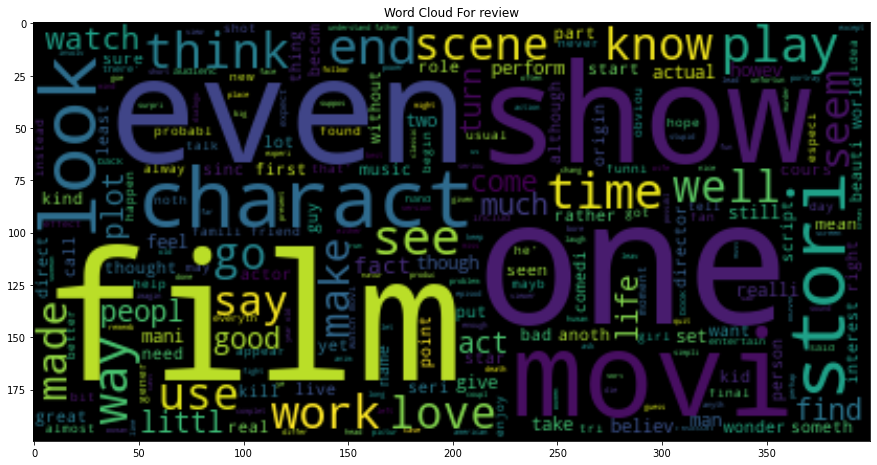

Total Time Taken: 51.56397557258606 ms


In [107]:
tic = time.time()
generate_word_cloud(raw_reviews_df,"review",background_color="black")
toc = time.time()
diff = toc - tic
print("Total Time Taken: " + str(diff) + " ms")

<p> <h5> 
Clearly the new text preprocessing method resulted in much more cleaner reviews, the prominent "br" tag that has massive occurence is not visible anymore. Thanks to regular epression. Lets further examine these word could by looking into positive only and negative only reviews </h5> </p>

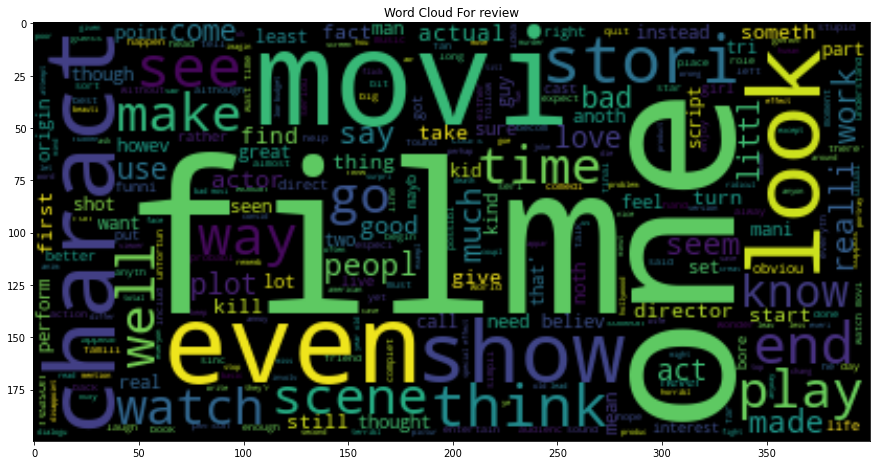

In [108]:
generate_word_cloud(raw_reviews_df[raw_reviews_df["sentiment"]=="negative"],"review",background_color="black")

<p> <h5> 
The word cloud above is for moview review that were labelled as negative </h5> </p>

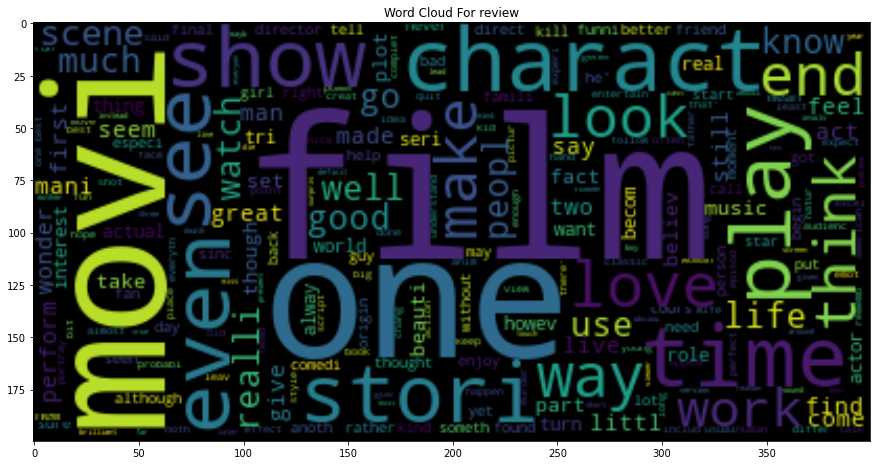

In [109]:
generate_word_cloud(raw_reviews_df[raw_reviews_df["sentiment"]=="positive"],"review",background_color="black")

<p> <h5> The word cloud above is for moview review that were labelled as positive. Lets generate features</h5> </p>

### Task 4: Generate Features from reviews And Numerical labels for Sentiment

<p> <h5>For trainning a machine learning model, the reviews have to be converted to numerical format. To do this the metric that will be used is TF-IDF (Term Document Frequency - Inverse Document Frequency). More about TF-IDF: https://en.wikipedia.org/wiki/Tf%E2%80%93idf </h5> </p>

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
vectorizer = TfidfVectorizer()

In [125]:
#make sure reveiws are in string format
raw_reviews_df["review"] = raw_reviews_df["review"].apply(lambda row_text: str(row_text))

In [126]:
feature_matrix = vectorizer.fit_transform(raw_reviews_df["review"].tolist())

In [136]:
feature_matrix.shape

(50000, 135665)

In [137]:
type(feature_matrix)

scipy.sparse.csr.csr_matrix

<p> <h5> Lets look at the features in the feature_matrix #vectorizer.get_feature_names()clearly, lots of features, every unique word in the cleaned review becomes a feature. Thats probably why there are features. To be exact there are 135665 features. More text removal could have been performed to reduce this.The sentiment for each review is labelled as positive or negative. Machine Learning Models require Numberical values so lets convert these labels to numerical labels </h5> </p> 

<p> <h4> The document-term matrix </h4> </p>

In [141]:
dt_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix, columns = vectorizer.get_feature_names())

In [142]:
dt_df.shape

(50000, 135665)

In [146]:
dt_df.iloc[30000:30005,30000:30005]

,daym,daymay,daymayb,daymio,dayo
30000,0.0,0.0,0.0,0.0,0.0
30001,0.0,0.0,0.0,0.0,0.0
30002,0.0,0.0,0.0,0.0,0.0
30003,0.0,0.0,0.0,0.0,0.0
30004,0.0,0.0,0.0,0.0,0.0


In [147]:
#import label encoder
from sklearn import preprocessing #library that alllows label encoding
label_encoder = preprocessing.LabelEncoder() #instantiate label encoder
raw_reviews_df["sentiment_encoded"] = label_encoder.fit_transform(raw_reviews_df["sentiment"]) #encode

In [148]:
raw_reviews_df[["sentiment","sentiment_encoded"]].iloc[0:5]

,sentiment,sentiment_encoded
0,positive,1
1,positive,1
2,positive,1
3,negative,0
4,positive,1


In [151]:
raw_reviews_df.iloc[0:2]

,Unnamed: 0,review,sentiment,sentiment_encoded
0,0,one review mention watch 1 oz episod hook righ...,positive,1
1,1,wonder littl product film techniqu unassum old...,positive,1


In [152]:
labels = raw_reviews_df["sentiment_encoded"].to_numpy()

In [153]:
labels.shape

(50000,)

<p> <h5> split the data into trainning and test set </h5> </p>

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
feature_matrix_train, feature_matrix_test, labels_train, labels_test = train_test_split(feature_matrix, labels, test_size=0.2, random_state=0)

In [156]:
print("Features Train Shape: ", feature_matrix_train.shape)
print("Labels Train Shape: ", labels_train.shape)
print("")
print("Features Test Shape: ", feature_matrix_test.shape)
print("Labels Test Shape: ", labels_test.shape)

Features Train Shape:  (40000, 135665)
Labels Train Shape:  (40000,)

Features Test Shape:  (10000, 135665)
Labels Test Shape:  (10000,)


<p> <h5> Now time to train few classical Machine Learning Models like Naive Bayes, Descision Trees, Support Vector Machine </h5> </p>

### Task 5: Train and Test Classical Machine Learning Models

In [158]:
#Train Naive Bayes Model
#More Details: https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(feature_matrix_train, labels_train)
y_pred_nb = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_nb.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_nb.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Naiive Bayes Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Naiive Bayes Model, Accuracy (Test Set) : ", accuracy_test_set)

Naiive Bayes Model, Accuracy (Train Set) :  0.90315
Naiive Bayes Model, Accuracy (Test Set) :  0.8471


In [176]:
#Train Descision Trees Model
#More Details: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
from sklearn.tree import DecisionTreeClassifier
maximum_tree_depth= 15
model_dt = DecisionTreeClassifier(max_depth=maximum_tree_depth)
model_dt.fit(feature_matrix_train, labels_train)
y_pred_dt = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_dt.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_dt.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Descision Tree Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Descision Tree Model, Accuracy (Test Set) : ", accuracy_test_set)

Descision Tree Model, Accuracy (Train Set) :  0.81325
Descision Tree Model, Accuracy (Test Set) :  0.7319


In [177]:
#Train K Nearest Negihbor Model
#More Details: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
#MOre Details: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
number_of_neigbors = 3
minkowski_power = 2 # Manhattan Distance = 1, Euclidean Distance = 2
model_knn = KNeighborsClassifier(n_neighbors=number_of_neigbors, p =minkowski_power)
model_knn.fit(feature_matrix_train, labels_train)
y_pred_knn = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_knn.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_knn.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("K Nearest Neighbors Model, Accuracy (Train Set) : ", accuracy_train_set)
print("K Nearest Neighbors Model, Accuracy (Test Set) : ", accuracy_test_set)

K Nearest Neighbors Model, Accuracy (Train Set) :  0.884725
K Nearest Neighbors Model, Accuracy (Test Set) :  0.7696


In [185]:
#Train Logistic Regression Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression #import model for logistic regression
l2_norm = 0.4 # regularization parameter
l2_norm_inverse = 1/l2_norm 
maximum_iterations=4000 #maximum number of iterations
model_lr = LogisticRegression(C=l2_norm_inverse,max_iter=maximum_iterations) #create logistic regression model
model_lr.fit(feature_matrix_train, labels_train)
y_pred_lr = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_lr.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_lr.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Logistic Regression Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Logistic Regression Model, Accuracy (Test Set) : ", accuracy_test_set)

Logistic Regression Model, Accuracy (Train Set) :  0.947925
Logistic Regression Model, Accuracy (Test Set) :  0.8889


In [199]:
#Train Support Vector Machine Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000 #maximum number of iterations
model_svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations) #create support vector machine model
model_svm.fit(feature_matrix_train, labels_train)
y_pred_svm = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_svm.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_svm.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Support Vector Machine Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Support Vector Machine Model, Accuracy (Test Set) : ", accuracy_test_set)

Support Vector Machine Model, Accuracy (Train Set) :  0.968625
Support Vector Machine Model, Accuracy (Test Set) :  0.8914


## Task 6: Train and Test  Ensemble of Classical Machine Learning Models
#### More Details: https://en.wikipedia.org/wiki/Ensemble_learning#Stacking
#### Mote Details: https://en.wikipedia.org/wiki/Boosting_(machine_learning)

In [220]:
tic = time.time()
#Create a stack of these estimators
estimators = [
    ("nb",model_nb), #stack naive bayes
    ("knn",model_knn), #stack K nearest neighor
    ('svm', model_svm) #stack support vector machine
]

#Train a stacked model
# Details: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
from sklearn.ensemble import StackingClassifier
model_stacked = StackingClassifier(estimators=estimators, final_estimator=model_lr) #use logisitc regression as the final estimator
model_stacked.fit(feature_matrix_train, labels_train)
toc = time.time()
y_pred_stacked = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_stacked.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_stacked.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Stacked ML Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Stacked ML Model, Accuracy (Test Set) : ", accuracy_test_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Stacked ML Model, Accuracy (Train Set) :  0.97275
Stacked ML Model, Accuracy (Test Set) :  0.9001
Time Taken: 164265.94829559326 ms


## Task6: Plot Evaluation Metrics for all Models

In [221]:
from sklearn.model_selection import train_test_split #split data into train,test sets
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve,  plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from matplotlib import pyplot as plt

In [222]:
#make a list of classifers
ml_models_list = [model_nb, #Naive Bayes
                  model_dt, #Descision Trees
                 model_knn, #K nearest neighbors
                 model_lr, #Logistic Regression
                 model_svm, #Support Vector Machine
                 model_stacked, #Stacked Model: NB, SVM, KNN, LR
                 ]

In [223]:
for model in ml_models_list:
    accuracy = model.score(feature_matrix_test,labels_test)  #get accuracy
    y_pred = model.predict(feature_matrix_test) #get predictions
    model_name = type(model).__name__
    print("Accuracy("+ model_name + "): ", accuracy.round(4)) #display accuracy
    print("Precision("+ model_name + "): ", precision_score(labels_test,y_pred).round(4)) #display precision
    print("Recall("+ model_name + "): ",recall_score(labels_test,y_pred).round(4)) #display recall
    print("\n")

Accuracy(BernoulliNB):  0.8471
Precision(BernoulliNB):  0.8679
Recall(BernoulliNB):  0.8163


Accuracy(DecisionTreeClassifier):  0.7319
Precision(DecisionTreeClassifier):  0.6933
Recall(DecisionTreeClassifier):  0.825


Accuracy(KNeighborsClassifier):  0.7696
Precision(KNeighborsClassifier):  0.7359
Recall(KNeighborsClassifier):  0.8361


Accuracy(LogisticRegression):  0.8889
Precision(LogisticRegression):  0.8842
Recall(LogisticRegression):  0.8933


Accuracy(LinearSVC):  0.8914
Precision(LinearSVC):  0.8869
Recall(LinearSVC):  0.8955


Accuracy(StackingClassifier):  0.9001
Precision(StackingClassifier):  0.9004
Recall(StackingClassifier):  0.8981




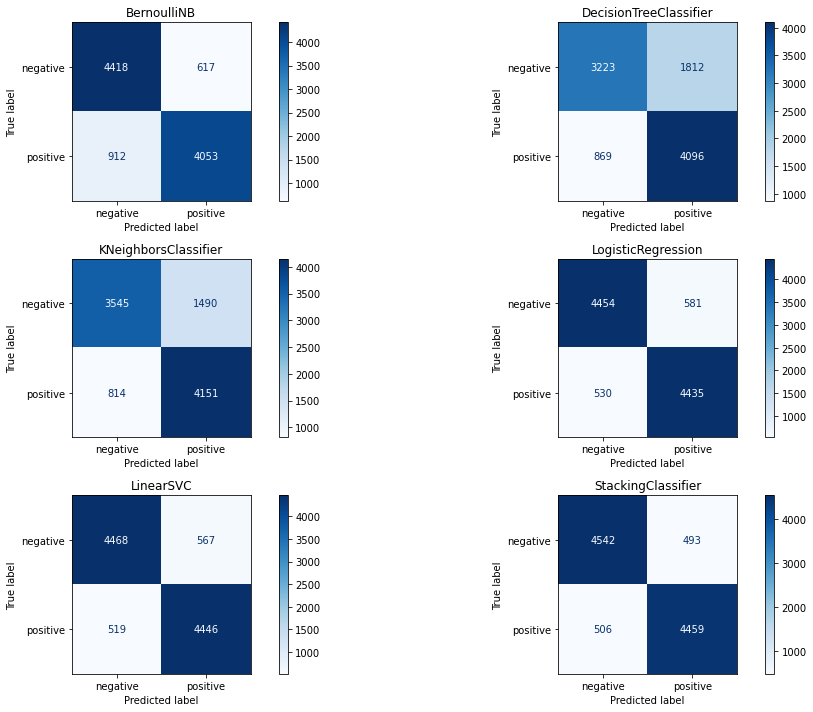

In [224]:
#Plot Confusion Matrix For all Models
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

for model,ax in zip(ml_models_list, axes.flatten()):
    
    plot_confusion_matrix(model, 
                          feature_matrix_test, 
                          labels_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=["negative","positive"])
    
    ax.title.set_text(type(model).__name__)
plt.tight_layout()  
plt.show()

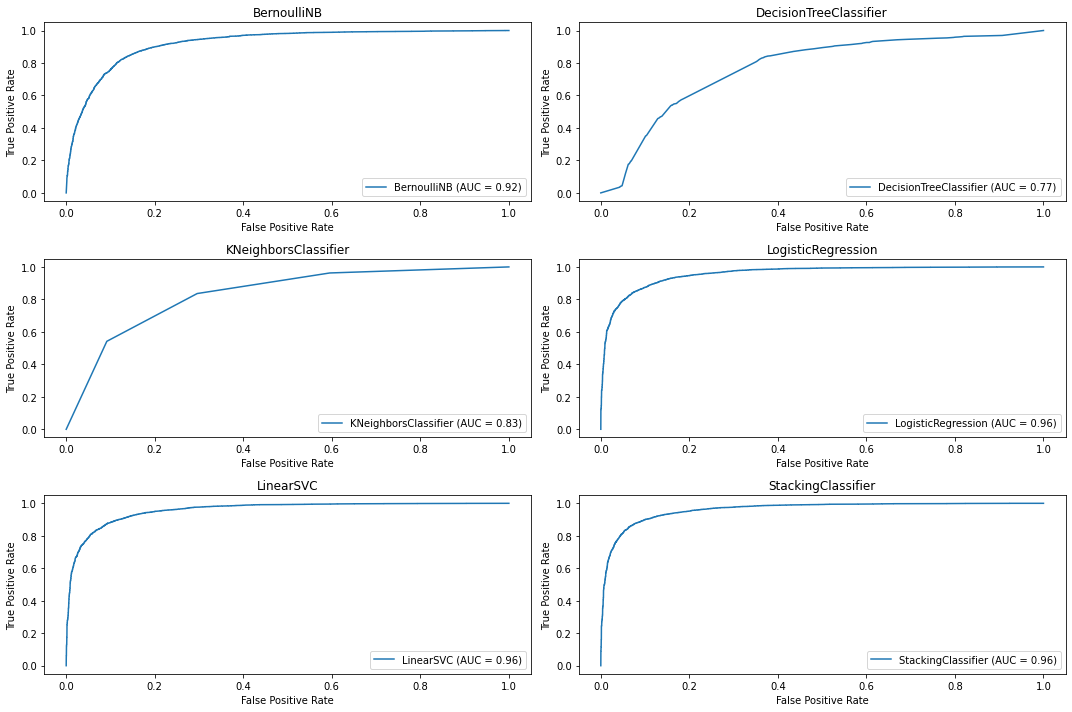

In [225]:
#Plot ROC Curve For all Models
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

for model, ax in zip(ml_models_list,axes.flatten()):
    
    plot_roc_curve(model,feature_matrix_test,labels_test,ax=ax)
    
    ax.title.set_text(type(model).__name__)

plt.tight_layout()  
plt.show()

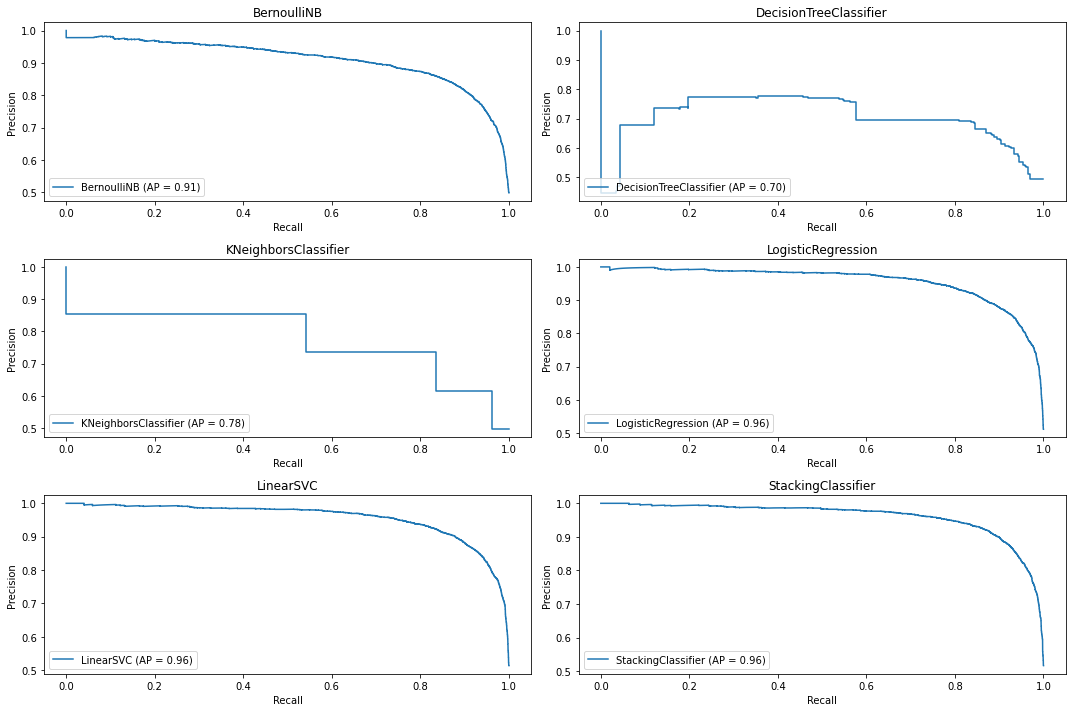

In [226]:
#Plot Precision Recall CUrve FOr ALl Models
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

for model, ax in zip(ml_models_list,axes.flatten()):
    
    plot_precision_recall_curve(model,feature_matrix_test,labels_test,ax=ax)
    
    ax.title.set_text(type(model).__name__)

plt.tight_layout()  
plt.show()

### Task 7: Summarize Performace of Machine Learning Models

<table>
    <tr>
        <th>Model</th>
        <th>Accuracy on Train Set</th>
        <th>Accuracy on Test Set</th>
        <th>Precision on Test Set</th>
        <th>Recall on Test Set</th>
    </tr>
    <tr>
        <td>Naive Bayes</td>
        <td>0.9032</td>
        <td>0.8471</td>
        <td>0.8679</td>
        <td>0.8163</td>
    </tr>
    <tr>
        <td>Descision Trees</td>
        <td>0.8133</td>
        <td>0.7319</td>
        <td>0.6933</td>
        <td>0.8250</td>         
    </tr>
    <tr>
        <td>K Nearest Neighbors</td>
        <td>0.8847</td>
        <td>0.7696</td>
        <td>0.7359</td>
        <td>0.8361</td>  
    </tr> 
    <tr>
        <td>Logistic Regression</td>
        <td>0.9479</td>
        <td>0.8889</td>
        <td>0.8842</td>
        <td>0.8933</td>        
    </tr>    
    <tr>
        <td>Support Vector Machine</td>
        <td>0.9686</td>
        <td>0.8914</td>
        <td>0.8869</td>
        <td>0.8955</td>        
    </tr>
    <tr>
        <td>Stacking(NB, SVM, LR)</td>
        <td>0.97275</td>
        <td>0.9001</td>
        <td>0.9004</td>
        <td>0.8981</td>        
    </tr> 
</table>